R-squared value on the test set: 0.9846


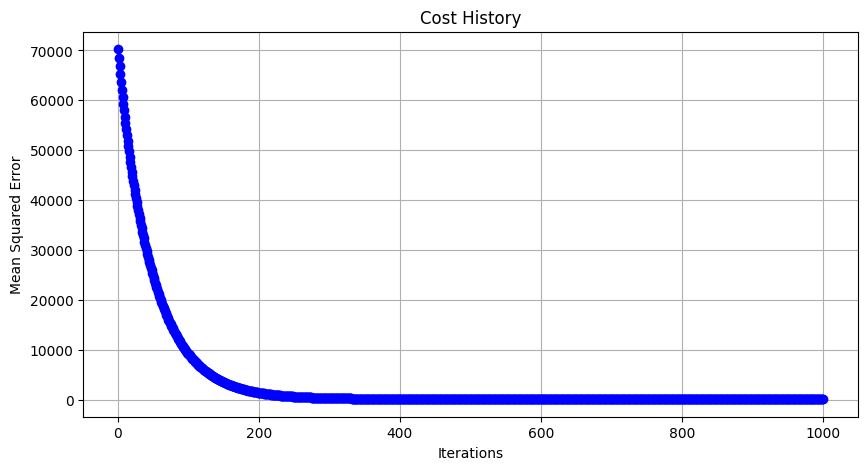

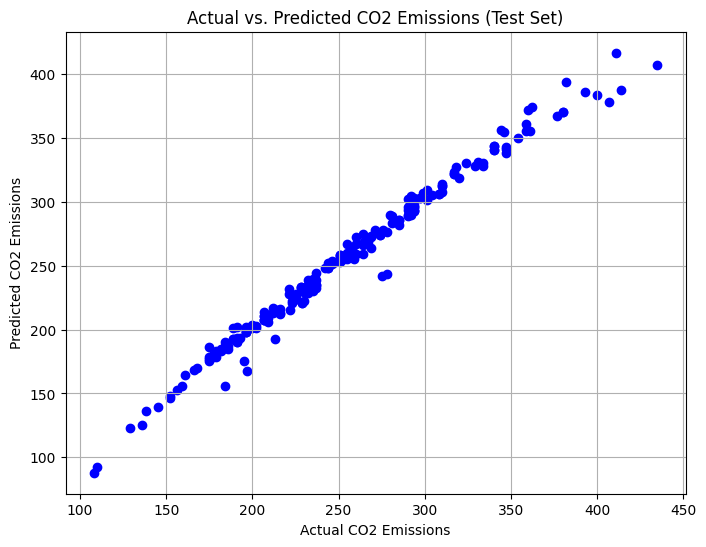

R-squared value (sklearn Linear Regression): 0.9922
R-squared value (Custom Model): 0.9846
R-squared value (sklearn Linear Regression): 0.9922


In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Fuel.csv')

# Drop non-numeric columns and columns that are not needed
columns_to_drop = ["MAKE", "MODEL", "VEHICLECLASS"]
dataset = dataset.drop(columns=columns_to_drop, errors="ignore")

# Encoding categorical data
categorical_cols = ["FUELTYPE", "TRANSMISSION"]
encoded_dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Extract numerical columns and target variable
X = encoded_dataset.drop(columns=['CO2EMISSIONS']).values
y = encoded_dataset['CO2EMISSIONS'].values

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a column of ones to X for the intercept term
ones_column = np.ones((X.shape[0], 1))
X = np.hstack((ones_column, X))

# Split the dataset into a training set and a test set
# Define the proportion of data to be used for testing
test_size = 0.2

# Calculate the number of samples for the test set
num_samples = len(X)
num_test_samples = int(test_size * num_samples)

# Create random indices for the test set
np.random.seed(42)  # You can change the seed for different random splits
test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

# Create training and test datasets
X_train = np.delete(X, test_indices, axis=0)
y_train = np.delete(y, test_indices, axis=0)
X_test = X[test_indices]
y_test = y[test_indices]

# Define a function to compute the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define a function to calculate the R-squared value
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Implementing linear regression using gradient descent
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    cost_history = []

    for i in range(num_iterations):
        # Calculate the predicted values
        y_pred = X.dot(theta)

        # Calculate the gradient
        gradient = (1 / num_samples) * X.T.dot(y_pred - y)

        # Update the parameters
        theta -= learning_rate * gradient

        # Calculate the cost (mean squared error) for this iteration
        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Hyperparameters for gradient descent
learning_rate = 0.01
num_iterations = 1000

# Training the linear regression model
theta, cost_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Making predictions on the test set
y_pred = X_test.dot(theta)


# Calculate the R-squared value for accuracy
r2 = r_squared(y_test, y_pred)
print(f'R-squared value on the test set: {r2:.4f}')

# Plot the cost history
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iterations + 1), cost_history, marker='o', linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost History')
plt.grid(True)
plt.show()

# Create scatter plot for actual vs. predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions (Test Set)')
plt.grid(True)
plt.show()

# compare your model’s performance with linear regression model from sklearn library

# Import the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
sklearn_model = LinearRegression()

# Train the sklearn linear regression model on the training data
sklearn_model.fit(X_train, y_train)

# Make predictions on the test set using the sklearn model
y_pred_sklearn = sklearn_model.predict(X_test)

# Calculate the R-squared value for accuracy of the sklearn model
r2_sklearn = r_squared(y_test, y_pred_sklearn)
print(f'R-squared value (sklearn Linear Regression): {r2_sklearn:.4f}')

# Compare the R-squared values of the custom model and sklearn model
print(f'R-squared value (Custom Model): {r2:.4f}')
print(f'R-squared value (sklearn Linear Regression): {r2_sklearn:.4f}')